In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 14

# Lets work on EURO per USD rates Dataset from Quandl

In [3]:
fx = pd.read_csv('BOE-XUDLERD.csv')
fx.head(3)

,Date,Value
0,2017-11-09,0.8603
1,2017-11-08,0.8631
2,2017-11-07,0.8639


In [4]:
fx = fx[::-1]
fx.head(3)

,Date,Value
10836,1975-01-02,0.7633
10835,1975-01-03,0.7585
10834,1975-01-06,0.7524


In [5]:
fx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10837 entries, 10836 to 0
Data columns (total 2 columns):
Date     10837 non-null object
Value    10837 non-null float64
dtypes: float64(1), object(1)
memory usage: 169.4+ KB


#### Making sure Pandas reads desired columns as dates

In [7]:
fx = pd.read_csv('BOE-XUDLERD.csv', parse_dates = ['Date'], dayfirst = False)
fx = fx[::-1]
fx.head(3)

,Date,Value
10836,1975-01-02,0.7633
10835,1975-01-03,0.7585
10834,1975-01-06,0.7524


In [8]:
fx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10837 entries, 10836 to 0
Data columns (total 2 columns):
Date     10837 non-null datetime64[ns]
Value    10837 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 169.4 KB


#### Extracting date features

In [12]:
fx['xyz'] = fx.Date.dt.hour
fx.head()

,Date,Value,xyz
10836,1975-01-02,0.7633,0
10835,1975-01-03,0.7585,0
10834,1975-01-06,0.7524,0
10833,1975-01-07,0.7510,0
10832,1975-01-08,0.7554,0


#### Making date column as index opens up additional features. Good option when dates are unique in each row.

In [13]:
fx = pd.read_csv('BOE-XUDLERD.csv', parse_dates = ['Date'], index_col='Date')
fx = fx[::-1]
fx.head(3)

,Value
Date,
1975-01-02,0.7633
1975-01-03,0.7585
1975-01-06,0.7524


In [14]:
fx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10837 entries, 1975-01-02 to 2017-11-09
Data columns (total 1 columns):
Value    10837 non-null float64
dtypes: float64(1)
memory usage: 169.3 KB


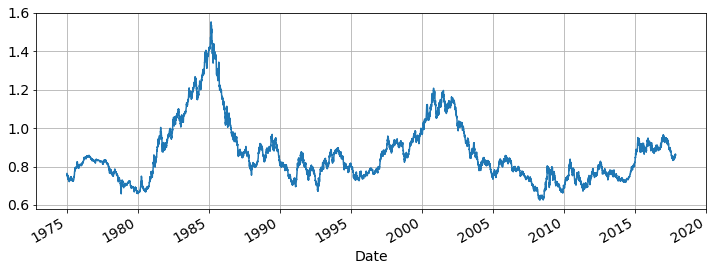

In [15]:
fx.Value.plot()
plt.show()

#### Resample - fixed period average

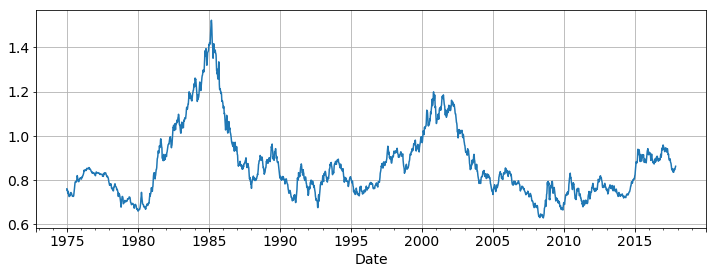

In [32]:
fxw  = fx.Value.resample('W').mean()
fxw.plot()
plt.show()

#### Rolling - Rolling period average

In [29]:
fx['roll_mean'] = fx.Value.rolling(5).mean()
fx.head(10)

,Value,roll_mean
Date,,
1975-01-02,0.7633,NaN
1975-01-03,0.7585,NaN
1975-01-06,0.7524,NaN
1975-01-07,0.7510,NaN
1975-01-08,0.7554,0.75612
1975-01-09,0.7551,0.75448
1975-01-10,0.7534,0.75346
1975-01-13,0.7540,0.75378
1975-01-14,0.7588,0.75534


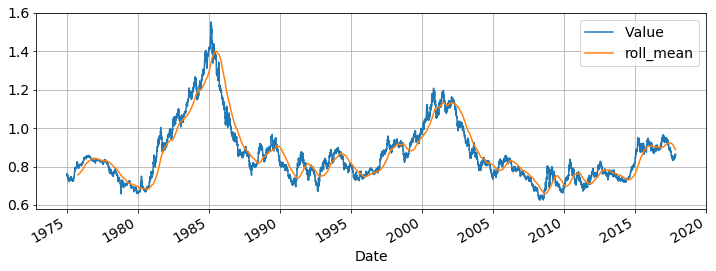

In [30]:
fx['roll_mean'] = fx.Value.rolling(200).mean()
fx.plot()
plt.show()

---
---

## Test for Stationarity - Augmented Dickey Fuller Test
* #### p - value: How likely it is to get a result like this if null hypothesis is True
* #### <font color = red> Always look at p-value in context of null hypothesis
* #### Significance value (alpha): if p- value is below this value we will reject null hypothesis, often 0.05
* #### Null hypothesis of the dickey fuller test is that the value is Non-stationary
* #### So we reject the null hypothesis that data is Non-stationary if the p values is less than 0.05

In [31]:
from statsmodels.tsa.stattools import adfuller

In [33]:
adfuller(fxw)[1] 

0.2541339550926388

### Remember Dickey fuller tests only Trend stationarity. So visualisation of data is not replacable.

In [35]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52).mean() 
    rolstd = timeseries.rolling(window=52).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)[1]
    print('p_value: ', dftest)

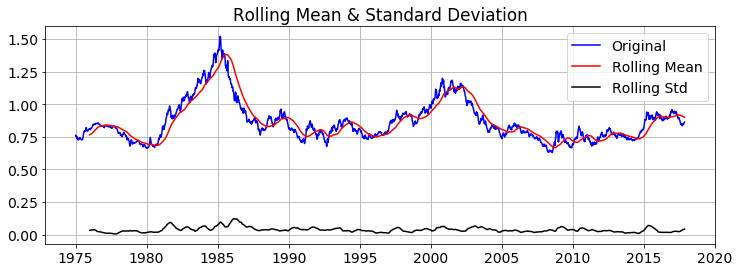

Results of Dickey-Fuller Test:
p_value:  0.2541339550926388


In [36]:
test_stationarity(fxw)

---

## Converting non stationary to stationary
* #### diff() = V(t) - V(t-1), sometimes multiple times
* #### log
* #### sqrt
* #### Proportion = V(t)/V(t-1)
* #### <font color =darkblue>Often simple solution {diff} is the best one

In [37]:
fxw.head()

Date
1975-01-05    0.76090
1975-01-12    0.75346
1975-01-19    0.75546
1975-01-26    0.74388
1975-02-02    0.73902
Freq: W-SUN, Name: Value, dtype: float64

In [38]:
fxw.diff().head()

Date
1975-01-05        NaN
1975-01-12   -0.00744
1975-01-19    0.00200
1975-01-26   -0.01158
1975-02-02   -0.00486
Freq: W-SUN, Name: Value, dtype: float64

In [39]:
fxw.diff().diff().head()

Date
1975-01-05        NaN
1975-01-12        NaN
1975-01-19    0.00944
1975-01-26   -0.01358
1975-02-02    0.00672
Freq: W-SUN, Name: Value, dtype: float64

### Lets check for Stationarity

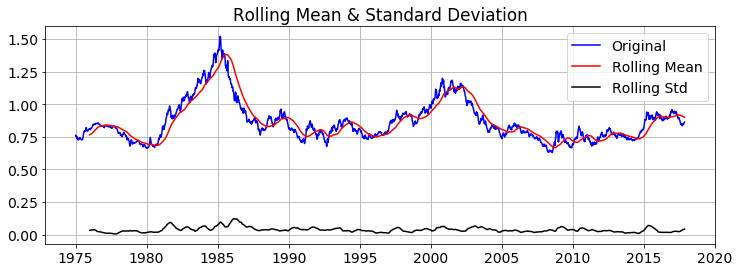

Results of Dickey-Fuller Test:
p_value:  0.2541339550926388


In [40]:
test_stationarity(fxw)

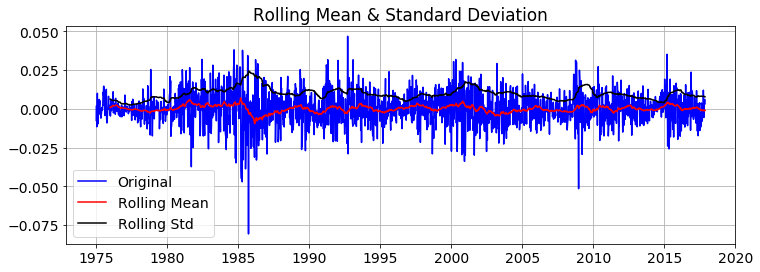

Results of Dickey-Fuller Test:
p_value:  0.0


In [43]:
test_stationarity(fxw.diff().dropna())